In [4]:
import pandas as pd

In [5]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [6]:
type(data)

dict

In [7]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11771,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.976743e+07,1.976743e+07,False,NaN,1,NaN,NaN,None,2024-10-14T11:46:00.000Z,64892.352475,2.985687e+10,85.9842,-0.033756,3.772982,3.237797,8.698962,10.435095,1.679469,1.282755e+12,56.9412,1.362739e+12,None,2024-10-14T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-14 14:47:50.473559
1,1027,Ethereum,ETH,ethereum,9413,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203850e+08,1.203850e+08,True,NaN,2,NaN,NaN,None,2024-10-14T11:46:00.000Z,2538.328168,1.489068e+10,69.0209,-0.065408,3.216804,3.171675,5.200614,-3.749518,-25.840920,3.055765e+11,13.5645,3.055765e+11,None,2024-10-14T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-14 14:47:50.473559
2,825,Tether USDt,USDT,tether,100193,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.197381e+11,1.213636e+11,True,NaN,3,NaN,NaN,None,2024-10-14T11:46:00.000Z,0.999303,5.435818e+10,58.2906,0.001713,-0.039046,-0.041949,-0.114947,-0.082794,-0.116421,1.196546e+11,5.3114,1.212790e+11,None,2024-10-14T11:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-14 14:47:50.473559
3,1839,BNB,BNB,bnb,2259,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459319e+08,1.459319e+08,False,NaN,4,NaN,NaN,None,2024-10-14T11:46:00.000Z,580.625196,1.655819e+09,14.9703,-0.076636,1.381911,1.837972,5.445836,10.794604,1.708429,8.473174e+10,3.7612,8.473174e+10,None,2024-10-14T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-14 14:47:50.473559
4,5426,Solana,SOL,solana,757,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.697605e+08,5.865768e+08,True,NaN,5,NaN,NaN,None,2024-10-14T11:46:00.000Z,152.795001,2.085962e+09,82.4427,-0.354360,4.133159,4.020146,11.787930,6.699298,-2.872095,7.177706e+10,3.1862,8.962601e+10,None,2024-10-14T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-14 14:47:50.473559
5,3408,USDC,USDC,usd-coin,22437,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.495343e+10,3.495343e+10,False,NaN,6,NaN,NaN,None,2024-10-14T11:45:00.000Z,0.999780,4.677665e+09,86.7379,-0.006220,-0.015265,-0.012294,-0.019103,-0.025060,-0.019284,3.494576e+10,1.5512,3.494576e+10,None,2024-10-14T11:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-14 14:47:50.473559
6,52,XRP,XRP,xrp,1404,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.664506e+10,9.998714e+10,False,NaN,7,NaN,NaN,None,2024-10-14T11:45:00.000Z,0.538488,8.374716e+08,46.5056,-0.266087,1.264044,0.715549,-8.756625,-5.426142,-1.323109,3.050266e+10,1.3540,5.384877e+10,None,2024-10-14T11:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-14 14:47:50.473559
7,74,Dogecoin,DOGE,dogecoin,1079,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.463622e+11,1.463622e+11,True,NaN,8,NaN,NaN,None,2024-10-14T11:45:00.000Z,0.112943,7.743161e+08,51.2086,-0.333170,2.026560,1.516594,7.320130,9.737163,-7.475818,1.653064e+10,0.7338,1.653064e+10,None,2024-10-14T11:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-14 14:47:50.473559
8,1958,TRON,TRX,tron,1048,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.654860e+10,8.654863e+

In [16]:
def api_runner():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\hp\OneDrive\Documents\Pandas Tutorial Files\API.csv'):
        df.to_csv(r'C:\Users\hp\OneDrive\Documents\Pandas Tutorial Files\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\hp\OneDrive\Documents\Pandas Tutorial Files\API.csv', mode='a', header = False)


# If that didn't work try using the local host URL as shown in the video

In [18]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed Successfully')
    sleep(60)
exit()

API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully


KeyboardInterrupt: 

In [20]:
df72 =pd.read_csv(r'C:\Users\hp\OneDrive\Documents\Pandas Tutorial Files\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11771,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.976746e+07,1.976746e+07,False,NaN,1,NaN,NaN,NaN,2024-10-14T12:14:00.000Z,64922.030587,3.014380e+10,88.8753,0.051126,3.667411,3.017705,8.589643,10.623608,1.794830,1.283344e+12,56.9678,1.363363e+12,NaN,2024-10-14T12:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-14 15:15:41.188953
1,1,1027,Ethereum,ETH,ethereum,9413,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.203850e+08,1.203850e+08,True,NaN,2,NaN,NaN,NaN,2024-10-14T12:14:00.000Z,2550.015484,1.501708e+10,71.1452,0.275653,3.548579,3.311155,5.271630,-3.251591,-25.271815,3.069835e+11,13.6270,3.069835e+11,NaN,2024-10-14T12:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-14 15:15:41.188953
2,2,825,Tether USDt,USDT,tether,100193,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.197381e+11,1.213636e+11,True,NaN,3,NaN,NaN,NaN,2024-10-14T12:14:00.000Z,0.999270,5.470854e+10,59.8014,-0.005897,-0.039075,-0.042371,-0.104888,-0.084090,-0.125944,1.196507e+11,5.3113,1.212750e+11,NaN,2024-10-14T12:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-14 15:15:41.188953
3,3,1839,BNB,BNB,bnb,2259,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459319e+08,1.459319e+08,False,NaN,4,NaN,NaN,NaN,2024-10-14T12:14:00.000Z,581.045959,1.655389e+09,15.4507,0.061642,1.430927,1.760431,5.211260,10.878228,1.773368,8.479315e+10,3.7640,8.479315e+10,NaN,2024-10-14T12:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-14 15:15:41.188953
4,4,5426,Solana,SOL,solana,757,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.697603e+08,5.865768e+08,True,NaN,5,NaN,NaN,NaN,2024-10-14T12:14:00.000Z,153.222936,2.088007e+09,82.5587,0.095345,4.296987,4.292108,11.702656,7.255316,-2.323915,7.197805e+10,3.1951,8.987701e+10,NaN,2024-10-14T12:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-14 15:15:41.188953
5,5,3408,USDC,USDC,usd-coin,22438,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.495188e+10,3.495188e+10,False,NaN,6,NaN,NaN,NaN,2024-10-14T12:13:00.000Z,0.999821,4.724326e+09,89.3385,-0.008414,-0.002493,-0.007508,-0.012248,-0.017485,-0.043792,3.494562e+10,1.5521,3.494562e+10,NaN,2024-10-14T12:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-14 15:15:41.188953
6,6,52,XRP,XRP,xrp,1404,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.664506e+10,9.998714e+10,False,NaN,7,NaN,NaN,NaN,2024-10-14T12:13:00.000Z,0.538704,8.400174e+08,46.9970,-0.200044,1.259377,0.462243,-8.094179,-5.317362,-1.346870,3.051491e+10,1.3553,5.387038e+10,NaN,2024-10-14T12:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-14 15:15:41.188953
7,7,74,Dogecoin,DOGE,dogecoin,1079,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.463625e+11,1.463625e+11,True,NaN,8,NaN,NaN,NaN,2024-10-14T12:13:00.000Z,0.113083,7.778667e+08,52.1073,-0.164293,1.926312,1.652065,7.162923,10.203824,-7.323660,1.655108e+10,0.7351,1.655108e+10,NaN,2024-10-14T12:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-14 15:15:41.188953
8,8,1958,TRON,TRX,tron,1048,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,8.654860e+10

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [21]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11771,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.976743e+07,1.976743e+07,False,NaN,1,NaN,NaN,None,2024-10-14T11:46:00.000Z,64892.352475,2.985687e+10,85.9842,-0.033756,3.772982,3.237797,8.698962,10.435095,1.679469,1.282755e+12,56.9412,1.362739e+12,None,2024-10-14T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-14 14:47:50.473559
1,1027,Ethereum,ETH,ethereum,9413,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203850e+08,1.203850e+08,True,NaN,2,NaN,NaN,None,2024-10-14T11:46:00.000Z,2538.328168,1.489068e+10,69.0209,-0.065408,3.216804,3.171675,5.200614,-3.749518,-25.840920,3.055765e+11,13.5645,3.055765e+11,None,2024-10-14T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-14 14:47:50.473559
2,825,Tether USDt,USDT,tether,100193,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.197381e+11,1.213636e+11,True,NaN,3,NaN,NaN,None,2024-10-14T11:46:00.000Z,0.999303,5.435818e+10,58.2906,0.001713,-0.039046,-0.041949,-0.114947,-0.082794,-0.116421,1.196546e+11,5.3114,1.212790e+11,None,2024-10-14T11:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-14 14:47:50.473559
3,1839,BNB,BNB,bnb,2259,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459319e+08,1.459319e+08,False,NaN,4,NaN,NaN,None,2024-10-14T11:46:00.000Z,580.625196,1.655819e+09,14.9703,-0.076636,1.381911,1.837972,5.445836,10.794604,1.708429,8.473174e+10,3.7612,8.473174e+10,None,2024-10-14T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-14 14:47:50.473559
4,5426,Solana,SOL,solana,757,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.697605e+08,5.865768e+08,True,NaN,5,NaN,NaN,None,2024-10-14T11:46:00.000Z,152.795001,2.085962e+09,82.4427,-0.354360,4.133159,4.020146,11.787930,6.699298,-2.872095,7.177706e+10,3.1862,8.962601e+10,None,2024-10-14T11:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-14 14:47:50.473559
5,3408,USDC,USDC,usd-coin,22437,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.495343e+10,3.495343e+10,False,NaN,6,NaN,NaN,None,2024-10-14T11:45:00.000Z,0.999780,4.677665e+09,86.7379,-0.006220,-0.015265,-0.012294,-0.019103,-0.025060,-0.019284,3.494576e+10,1.5512,3.494576e+10,None,2024-10-14T11:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-14 14:47:50.473559
6,52,XRP,XRP,xrp,1404,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.664506e+10,9.998714e+10,False,NaN,7,NaN,NaN,None,2024-10-14T11:45:00.000Z,0.538488,8.374716e+08,46.5056,-0.266087,1.264044,0.715549,-8.756625,-5.426142,-1.323109,3.050266e+10,1.3540,5.384877e+10,None,2024-10-14T11:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-14 14:47:50.473559
7,74,Dogecoin,DOGE,dogecoin,1079,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.463622e+11,1.463622e+11,True,NaN,8,NaN,NaN,None,2024-10-14T11:45:00.000Z,0.112943,7.743161e+08,51.2086,-0.333170,2.026560,1.516594,7.320130,9.737163,-7.475818,1.653064e+10,0.7338,1.653064e+10,None,2024-10-14T11:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-14 14:47:50.473559
8,1958,TRON,TRX,tron,1048,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.654860e+10,8.654863e+

In [25]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.033756,3.772982,3.237797,8.698962,10.435095,1.679469
Ethereum,-0.065408,3.216804,3.171675,5.200614,-3.749518,-25.840920
Tether USDt,0.001713,-0.039046,-0.041949,-0.114947,-0.082794,-0.116421
BNB,-0.076636,1.381911,1.837972,5.445836,10.794604,1.708429
Solana,-0.354360,4.133159,4.020146,11.787930,6.699298,-2.872095
USDC,-0.006220,-0.015265,-0.012294,-0.019103,-0.025060,-0.019284
XRP,-0.266087,1.264044,0.715549,-8.756625,-5.426142,-1.323109
Dogecoin,-0.333170,2.026560,1.516594,7.320130,9.737163,-7.475818
TRON,0.056683,-1.749654,2.748066,8.065688,21.185953,19.153609


In [26]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.033756
              quote.USD.percent_change_24h     3.772982
              quote.USD.percent_change_7d      3.237797
              quote.USD.percent_change_30d     8.698962
              quote.USD.percent_change_60d    10.435095
              quote.USD.percent_change_90d     1.679469
Ethereum      quote.USD.percent_change_1h     -0.065408
              quote.USD.percent_change_24h     3.216804
              quote.USD.percent_change_7d      3.171675
              quote.USD.percent_change_30d     5.200614
              quote.USD.percent_change_60d    -3.749518
              quote.USD.percent_change_90d   -25.840920
Tether USDt   quote.USD.percent_change_1h      0.001713
              quote.USD.percent_change_24h    -0.039046
              quote.USD.percent_change_7d     -0.041949
              quote.USD.percent_change_30d    -0.114947
              quote.USD.percent_change_60d    -0.082794
     

In [28]:
type(df4)

pandas.core.series.Series

In [29]:
df5 = df4.to_frame(name='values')
df5

values
name                                                
Bitcoin      quote.USD.percent_change_1h   -0.033756
             quote.USD.percent_change_24h   3.772982
             quote.USD.percent_change_7d    3.237797
             quote.USD.percent_change_30d   8.698962
             quote.USD.percent_change_60d  10.435095
             quote.USD.percent_change_90d   1.679469
Ethereum     quote.USD.percent_change_1h   -0.065408
             quote.USD.percent_change_24h   3.216804
             quote.USD.percent_change_7d    3.171675
             quote.USD.percent_change_30d   5.200614
             quote.USD.percent_change_60d  -3.749518
             quote.USD.percent_change_90d -25.840920
Tether USDt  quote.USD.percent_change_1h    0.001713
             quote.USD.percent_change_24h  -0.039046
             quote.USD.percent_change_7d   -0.041949
             quote.USD.percent_change_30d  -0.114947
             quote.USD.percent_change_60d  -0.082794
             quote.USD.percent_change_90d  -0.116421
BNB          quote.USD.percent_change_1h   -0.076636
             quote.USD.percent_change_24h   1.381911
             quote.USD.percent_change_7d    1.837972
             quote.USD.percent_change_30d   5.445836
             quote.USD.percent_change_60d  10.794604
             quote.USD.percent_change_90d   1.708429
Solana       quote.USD.percent_change_1h   -0.354360
             quote.USD.percent_change_24h   4.133159
             quote.USD.percent_change_7d    4.020146
             quote.USD.percent_change_30d  11.787930
             quote.USD.percent_change_60d   6.699298
             quote.USD.percent_change_90d  -2.872095
USDC         quote.USD.percent_change_1h   -0.006220
             quote.USD.percent_change_24h  -0.015265
             quote.USD.percent_change_7d   -0.012294
             quote.USD.percent_change_30d  -0.019103
             quote.USD.percent_change_60d  -0.025060
             quote.USD.percent_change_90d  -0.019284
XRP          quote.USD.percent_change_1h   -0.266087
             quote.USD.percent_change_24h   1.264044
             quote.USD.percent_change_7d    0.715549
             quote.USD.percent_change_30d  -8.756625
             quote.USD.percent_change_60d  -5.426142
             quote.USD.percent_change_90d  -1.323109
Dogecoin     quote.USD.percent_change_1h   -0.333170
             quote.USD.percent_change_24h   2.026560
             quote.USD.percent_change_7d    1.516594
             quote.USD.percent_change_30d   7.320130
             quote.USD.percent_change_60d   9.737163
             quote.USD.percent_change_90d  -7.475818
TRON         quote.USD.percent_change_1h    0.056683
             quote.USD.percent_change_24h  -1.749654
             quote.USD.percent_change_7d    2.748066
             quote.USD.percent_change_30d   8.065688
             quote.USD.percent_change_60d  21.185953
             quote.USD.percent_change_90d  19.153609
Toncoin      quote.USD.percent_change_1h    0.246134
             quote.USD.percent_change_24h   0.682096
             quote.USD.percent_change_7d    0.830007
             quote.USD.percent_change_30d  -7.490023
             quote.USD.percent_change_60d -19.503464
             quote.USD.percent_change_90d -28.426986
Cardano      quote.USD.percent_change_1h   -0.015809
             quote.USD.percent_change_24h   0.733933
             quote.USD.percent_change_7d   -0.200871
             quote.USD.percent_change_30d   0.375233
             quote.USD.percent_change_60d   6.026959
             quote.USD.percent_change_90d -17.675497
Avalanche    quote.USD.percent_change_1h   -0.147061
             quote.USD.percent_change_24h   1.141937
             quote.USD.percent_change_7d    8.859756
             quote.USD.percent_change_30d  18.554471
             quote.USD.percent_change_60d  38.628717
             quote.USD.percent_change_90d   7.421122
Shiba Inu    quote.USD.percent_change_1h   -0.252315
             quote.USD.percent_change_24h   3.073733
             quote

In [31]:
df5.count()

values    90
dtype: int64

In [35]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.033756
1,Bitcoin,quote.USD.percent_change_24h,3.772982
2,Bitcoin,quote.USD.percent_change_7d,3.237797
3,Bitcoin,quote.USD.percent_change_30d,8.698962
4,Bitcoin,quote.USD.percent_change_60d,10.435095
5,Bitcoin,quote.USD.percent_change_90d,1.679469
6,Ethereum,quote.USD.percent_change_1h,-0.065408
7,Ethereum,quote.USD.percent_change_24h,3.216804
8,Ethereum,quote.USD.percent_change_7d,3.171675
9,Ethereum,quote.USD.percent_change_30d,5.200614


In [36]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.033756
1,Bitcoin,quote.USD.percent_change_24h,3.772982
2,Bitcoin,quote.USD.percent_change_7d,3.237797
3,Bitcoin,quote.USD.percent_change_30d,8.698962
4,Bitcoin,quote.USD.percent_change_60d,10.435095
5,Bitcoin,quote.USD.percent_change_90d,1.679469
6,Ethereum,quote.USD.percent_change_1h,-0.065408
7,Ethereum,quote.USD.percent_change_24h,3.216804
8,Ethereum,quote.USD.percent_change_7d,3.171675
9,Ethereum,quote.USD.percent_change_30d,5.200614


In [40]:
df7['percent_change'].replace(['quote.USD.percent_change_1h'], ['1h'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.033756
1,Bitcoin,quote.USD.percent_change_24h,3.772982
2,Bitcoin,quote.USD.percent_change_7d,3.237797
3,Bitcoin,quote.USD.percent_change_30d,8.698962
4,Bitcoin,quote.USD.percent_change_60d,10.435095
5,Bitcoin,quote.USD.percent_change_90d,1.679469
6,Ethereum,quote.USD.percent_change_1h,-0.065408
7,Ethereum,quote.USD.percent_change_24h,3.216804
8,Ethereum,quote.USD.percent_change_7d,3.171675
9,Ethereum,quote.USD.percent_change_30d,5.200614


In [44]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.033756
1,Bitcoin,24h,3.772982
2,Bitcoin,7d,3.237797
3,Bitcoin,30d,8.698962
4,Bitcoin,60d,10.435095
5,Bitcoin,90d,1.679469
6,Ethereum,1h,-0.065408
7,Ethereum,24h,3.216804
8,Ethereum,7d,3.171675
9,Ethereum,30d,5.200614


In [37]:
import seaborn as sns
import matplotlib as plt

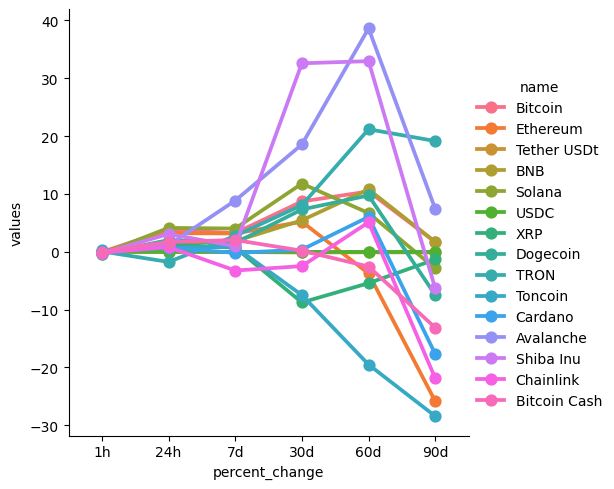

In [45]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [48]:
df10 = df[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,64892.352475,2024-10-14 14:47:50.473559


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

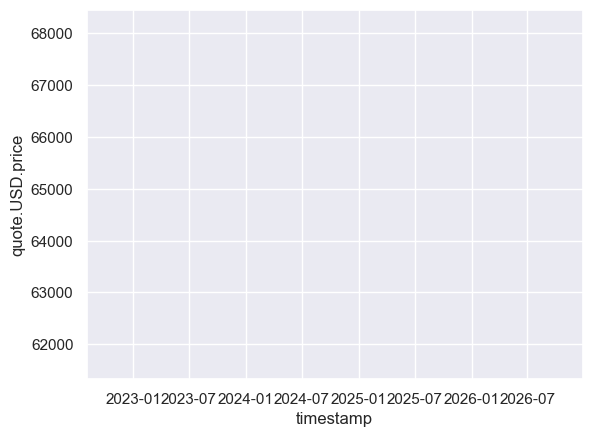

In [50]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)